In [6]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("student_performance .csv")
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


In [10]:
df.isnull().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [11]:
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_rows = df[outliers]
print(outlier_rows)

   StudentID    Name Gender  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
6          7  Daniel   Male              70                  8             60   

   ExtracurricularActivities ParentalSupport  FinalGrade  
6                          0             Low          62  


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

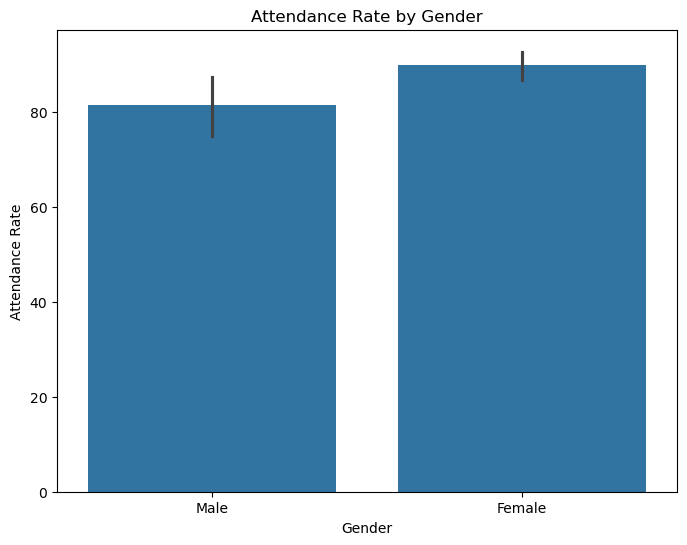

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='AttendanceRate', data=df)
plt.xlabel('Gender')
plt.ylabel('Attendance Rate')
plt.title('Attendance Rate by Gender')

plt.show()

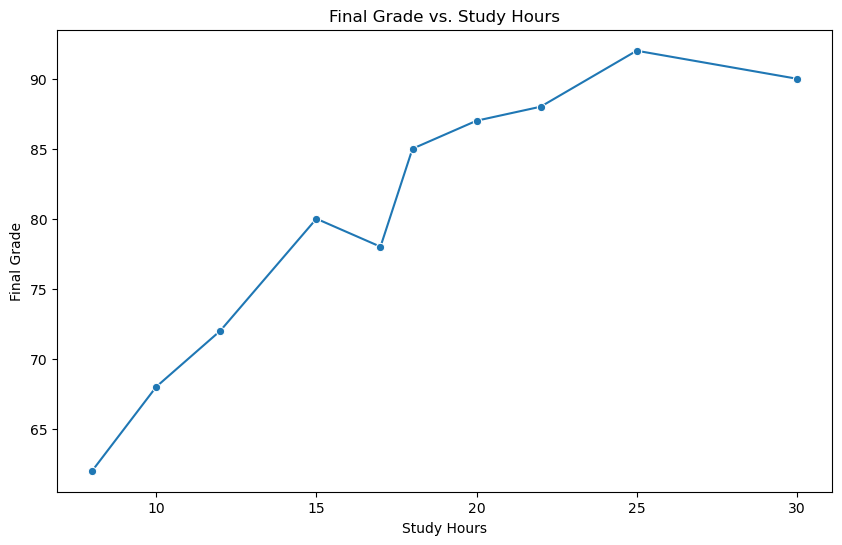

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='StudyHoursPerWeek', y='FinalGrade', data=df, marker='o')

plt.xlabel('Study Hours')
plt.ylabel('Final Grade')
plt.title('Final Grade vs. Study Hours')

plt.show()

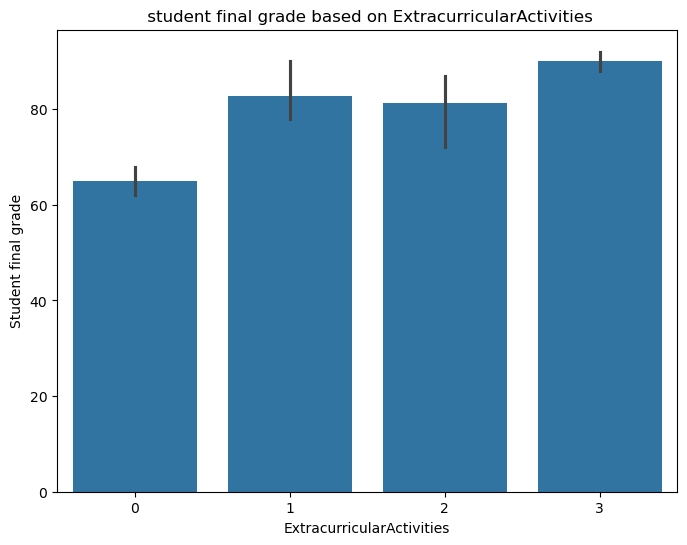

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='ExtracurricularActivities', y='FinalGrade', data=df)
plt.xlabel('ExtracurricularActivities')
plt.ylabel('Student final grade')
plt.title(' student final grade based on ExtracurricularActivities')

plt.show()